### `Import main Libraries and Frameworks`

In [34]:
## main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import boxcox
plt.style.use('ggplot')
import joblib

## for preprocessing and preparing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score
from sklearn import utils

## Models -- sklearn
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

## Models -- Xgboost
from xgboost import XGBRegressor

### `Reading the Dataset and Look at the big Picture`

In [2]:
## Reading the Dataset
df = pd.read_excel('file.xlsx', sheet_name='Sheet1')
df.head()

,DELTA,AGE,FC%,LC(ft/mile),TC(ft/mile),RUT(in)
0,0.377953,1.10,0.000000,0.00000,0.000000,0.15748
1,1.448819,1.48,0.000000,0.00000,0.000000,0.15748
2,2.519685,1.94,0.000000,0.00000,0.000000,0.15748
3,3.338583,2.40,0.000000,0.00000,0.000000,0.15748
4,3.590551,2.86,0.073099,24.17461,10.360547,0.19685


In [3]:
## Shuffling the Dataset to split randomly --> helping the model training 
df = utils.shuffle(df, random_state=123)
df.head()

,DELTA,AGE,FC%,LC(ft/mile),TC(ft/mile),RUT(in)
1584,1.385827,3.99,0.000000,0.000000,0.0000,0.157480
249,28.976378,13.46,10.295164,7431.965741,1806.1887,0.236220
1142,6.488189,3.39,0.000000,0.000000,0.0000,0.157480
809,0.125984,0.85,0.000000,0.000000,0.0000,0.078740
657,7.622047,0.62,0.000000,0.000000,0.0000,0.590551


### `Exploring the Dataset and Feature Engineering`

In [4]:
## take a copy from the main DataFrame for changing of Feature Engineering
df_new = df.copy()

`Explore the (DELTA) Column (target)`

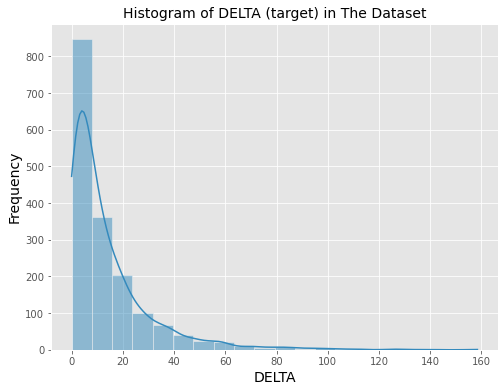

In [5]:
## Explore the Target
plt.figure(figsize=(8, 6))
sns.histplot(x='DELTA', data=df, bins=20, kde=True)
plt.xlabel('DELTA', fontsize=14, color='k')
plt.ylabel('Frequency', fontsize=14, color='k')
plt.title('Histogram of DELTA (target) in The Dataset', fontsize=14, color='k')
plt.show()

>`It seems that it takes (exponential Distribution) -- it is preferable to take the log, but the column contanis zeros so we will take log(value + 1)`

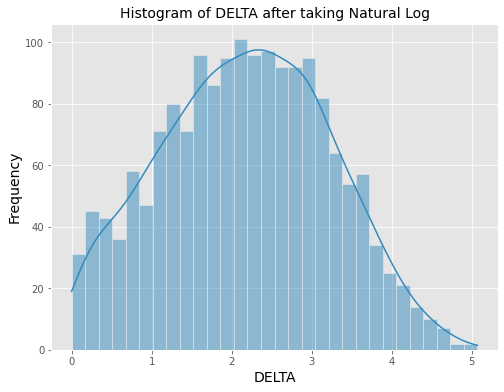

In [6]:
## taking the natural log for this column --> will be almost Normal Distribution
df_new['DELTA'] = np.log(df_new['DELTA']+1)


## check Distribution again
plt.figure(figsize=(8, 6))
sns.histplot(df_new['DELTA'], bins=30, kde=True)
plt.title('Histogram of DELTA after taking Natural Log', fontsize=14, color='k')
plt.xlabel('DELTA', fontsize=14, color='k')
plt.ylabel('Frequency', fontsize=14, color='k')
plt.show()

`Explore the (AGE) Column`

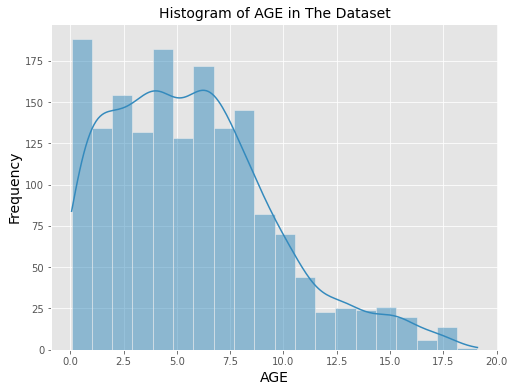

In [7]:
## Explore the AGE Column
plt.figure(figsize=(8, 6))
sns.histplot(x='AGE', data=df, bins=20, kde=True)
plt.xlabel('AGE', fontsize=14, color='k')
plt.ylabel('Frequency', fontsize=14, color='k')
plt.title('Histogram of AGE in The Dataset', fontsize=14, color='k')
plt.show()

>`I will try using (box-cox) transformation for this column`

<img src='https://miro.medium.com/max/884/1*_nHvGg-OQYtNSSZph-424g.png' alt="boxcox" width=400>

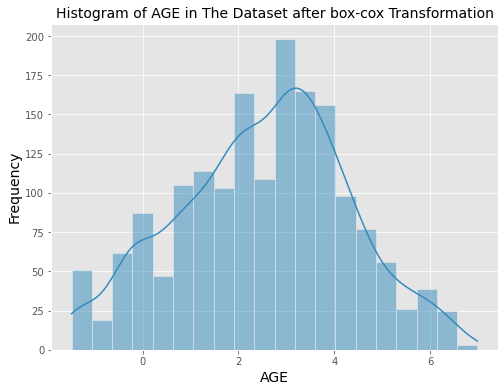

In [8]:
## Let's try Boxcox  ---> Normal Distribution
df_new['AGE'] = boxcox(df_new['AGE'])[0]

## Check again
plt.figure(figsize=(8, 6))
sns.histplot(x='AGE', data=df_new, bins=20, kde=True)
plt.xlabel('AGE', fontsize=14, color='k')
plt.ylabel('Frequency', fontsize=14, color='k')
plt.title('Histogram of AGE in The Dataset after box-cox Transformation', fontsize=14, color='k')
plt.show()

`Explore the (FC%) Column`

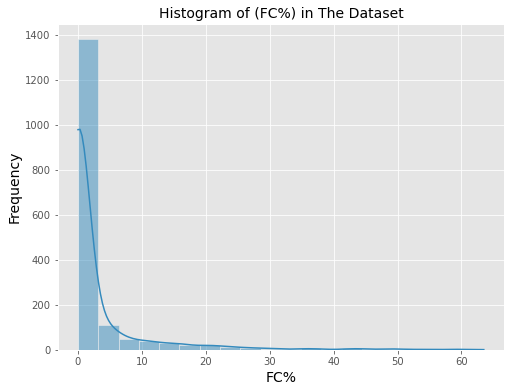

In [9]:
## Explore the AGE Column
plt.figure(figsize=(8, 6))
sns.histplot(x='FC%', data=df, bins=20, kde=True)
plt.xlabel('FC%', fontsize=14, color='k')
plt.ylabel('Frequency', fontsize=14, color='k')
plt.title('Histogram of (FC%) in The Dataset', fontsize=14, color='k')
plt.show()

>`It seems that it takes (exponential Distribution) -- I tried box-cox and natural-log but none of them was useful`

> `Explore the LC(ft/mile) & TC(ft/mile) Columns, -- I tried box-cox and natural-log but none of them was useful`

`Explore (RUT(in)) Column`

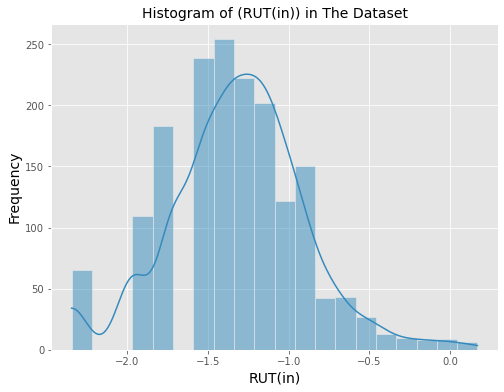

In [10]:
## Let's try Box-cox Transformation --> Normal Distribution
df_new['RUT(in)'] = boxcox(df_new['RUT(in)'])[0]


## Explore the RUT(in) again
plt.figure(figsize=(8, 6))
sns.histplot(x='RUT(in)', data=df_new, bins=20, kde=True)
plt.xlabel('RUT(in)', fontsize=14, color='k')
plt.ylabel('Frequency', fontsize=14, color='k')
plt.title('Histogram of (RUT(in)) in The Dataset', fontsize=14, color='k')
plt.show()

`Check perason Correlation`

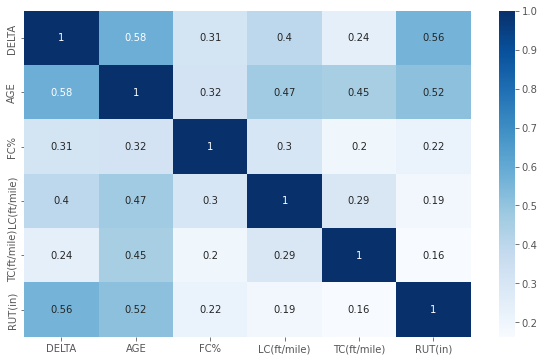

In [11]:
## Checking the (pearson) correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df_new.corr(), annot=True, cmap='Blues');

### `Split the Dataset using the ordinary Method`

In [12]:
## return the DELTA column with its main values without taking log
## I will split the Data first the take log before training Models
df_new['DELTA'] = df['DELTA']

In [13]:
## split the dataset --> make the test set work as (validation and testing) as the dataset is very small
## It is enough to take 0.20 of the Dataset as a validation Dataset 

## Split to target and Features
X = df_new.drop(columns=['DELTA'], axis=1)
y = df_new['DELTA']

## split to training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.2)


## check shapes after splitting
print('X_train shape =>', X_train.shape)
print('y_train shape =>', y_train.shape)
print('=='*15)
print('X_test shape =>', X_test.shape)
print('y_test shape =>', y_test.shape)

X_train shape => (1363, 5)
y_train shape => (1363,)
X_test shape => (341, 5)
y_test shape => (341,)


### `Try to Standardize Data`

In [14]:
## Scaling the Features to (mean=0, std=1) --> standard Normal Distr.
scaler = StandardScaler()
X_train_final = scaler.fit_transform(X_train)
X_test_final = scaler.transform(X_test)

In [15]:
## for target --> taking the log again, we almost ready to train Models
y_train_final = np.log(y_train + 1)
y_test_final = np.log(y_test + 1)

### `Building ML Models`

### `LinearRegression`

In [16]:
## Try simple LinearRegression
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_train_final, y_train_final)

LinearRegression()

In [17]:
## Predicted values using LinearRegression
y_pred_train_lin = np.exp(lin_reg.predict(X_train_final)) - 1
y_pred_test_lin = np.exp(lin_reg.predict(X_test_final)) - 1

score_train_lin = r2_score(y_train, y_pred_train_lin)
score_test_lin = r2_score(y_test, y_pred_test_lin)

print('score_train_lin :', score_train_lin)
print('score_test_lin :', score_test_lin)

score_train_lin : 0.24155870773235388
score_test_lin : 0.19415768900382224


### `SGD Regressor`

In [18]:
## Try SGD Regression
sgd_reg = SGDRegressor()
sgd_reg.fit(X_train_final, y_train_final)

SGDRegressor()

In [19]:
## Predicted values using LinearRegression
y_pred_train_sgd = np.exp(sgd_reg.predict(X_train_final)) - 1
y_pred_test_sgd = np.exp(sgd_reg.predict(X_test_final)) - 1

score_train_sgd = r2_score(y_train, y_pred_train_sgd)
score_test_sgd = r2_score(y_test, y_pred_test_sgd)

print('score_train_sgd :', score_train_sgd)
print('score_test_sgd :', score_test_sgd)

score_train_sgd : 0.24141233605291612
score_test_sgd : 0.19321830278132834


### `Try KNN`

In [20]:
## Define the Model
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_final, y_train_final)

KNeighborsRegressor()

In [21]:
## Predicted values using KNN
y_pred_train_knn = np.exp(knn_reg.predict(X_train_final)) - 1
y_pred_test_knn = np.exp(knn_reg.predict(X_test_final)) - 1

score_train_knn = r2_score(y_train, y_pred_train_knn)
score_test_knn = r2_score(y_test, y_pred_test_knn)

print('score_train_knn :', score_train_knn)
print('score_test_knn :', score_test_knn)

score_train_knn : 0.6363818145532818
score_test_knn : 0.4425114805653467


In [22]:
## Tuning
params_best_knn = {'n_neighbors': np.arange(1, 10, 2)}

grid_knn = GridSearchCV(estimator=knn_reg, param_grid=params_best_knn, cv=5, scoring='r2', n_jobs=-1)
grid_knn.fit(X_train_final, y_train_final)

print('Best Parameters: ', grid_knn.best_params_)

## best Model with best parameters
best_knn = grid_knn.best_estimator_
print('Best Model KNN: ', best_knn)

Best Parameters:  {'n_neighbors': 3}
Best Model KNN:  KNeighborsRegressor(n_neighbors=3)


In [23]:
## Predicted values using KNN
y_pred_train_knn = np.exp(best_knn.predict(X_train_final)) - 1
y_pred_test_knn = np.exp(best_knn.predict(X_test_final)) - 1

score_train_knn = r2_score(y_train, y_pred_train_knn)
score_test_knn = r2_score(y_test, y_pred_test_knn)

print('score_train_knn :', score_train_knn)
print('score_test_knn :', score_test_knn)

score_train_knn : 0.7596133143183311
score_test_knn : 0.4567563446624976


### `Try RandomForest`

In [24]:
## Define the Model
forest_reg = RandomForestRegressor(n_estimators=200, max_depth=20)
forest_reg.fit(X_train_final, y_train_final)

RandomForestRegressor(max_depth=20, n_estimators=200)

In [25]:
## Predicted values using RandomForest
y_pred_train_forest = np.exp(forest_reg.predict(X_train_final)) - 1
y_pred_test_forest = np.exp(forest_reg.predict(X_test_final)) - 1

score_train_forest = r2_score(y_train, y_pred_train_forest)
score_test_forest = r2_score(y_test, y_pred_test_forest)

print('score_train_forest :', score_train_forest)
print('score_test_forest :', score_test_forest)

score_train_forest : 0.8816673963296628
score_test_forest : 0.578967053375808


In [26]:
params_best_forest = {'n_estimators': np.arange(100, 200, 20),
                    'max_depth': np.arange(15, 30, 2)}

grid_forest = GridSearchCV(estimator=forest_reg, param_grid=params_best_forest, cv=5, scoring='r2', n_jobs=-1, verbose=6)
grid_forest.fit(X_train_final, y_train_final)

print('Best Parameters: ', grid_forest.best_params_)

## best Model with best parameters
best_forest = grid_forest.best_estimator_
print('Best Model Forest: ', best_forest)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters:  {'max_depth': 19, 'n_estimators': 120}
Best Model Forest:  RandomForestRegressor(max_depth=19, n_estimators=120)


In [27]:
## Predicted values using RandomForest
y_pred_train_forest = np.exp(best_forest.predict(X_train_final)) - 1
y_pred_test_forest = np.exp(best_forest.predict(X_test_final)) - 1

score_train_forest = r2_score(y_train, y_pred_train_forest)
score_test_forest = r2_score(y_test, y_pred_test_forest)

print('score_train_forest :', score_train_forest)
print('score_test_forest :', score_test_forest)

score_train_forest : 0.8808451041808271
score_test_forest : 0.5817139850686336


### `Xgboost`

In [28]:
xgb_reg = XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=300, reg_lambda=2, subsample=0.9)
xgb_reg.fit(X_train_final, y_train_final)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=2, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
## Predicted values using Xgboost
y_pred_train_xgb = np.exp(xgb_reg.predict(X_train_final)) - 1
y_pred_test_xgb = np.exp(xgb_reg.predict(X_test_final)) - 1

score_train_xgb = r2_score(y_train, y_pred_train_xgb)
score_test_xgb = r2_score(y_test, y_pred_test_xgb)

print('score_train_xgb :', score_train_xgb)
print('score_test_xgb :', score_test_xgb)

score_train_xgb : 0.9334560541314906
score_test_xgb : 0.67459533544896


In [30]:
## Tuning xgboost
params_best_xgb = {'max_depth': [4, 6], 
                  'learning_rate': [0.15, 0.18], 
                  'n_estimators': [100, 150, 200],
                  'subsample': [0.9, 1]}


grid_xgb = GridSearchCV(estimator=xgb_reg, param_grid=params_best_xgb, cv=5, scoring='r2', n_jobs=-1, verbose=6)
grid_xgb.fit(X_train_final, y_train_final)

print('Best Parameters: ', grid_xgb.best_params_)

## best Model with best parameters
best_xgb = grid_xgb.best_estimator_
print('Best Model Xgboost: ', best_xgb)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters:  {'learning_rate': 0.18, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.9}
Best Model Xgboost:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.18, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=2, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [31]:
## Predicted values using Xgboost
y_pred_train_xgb = np.exp(best_xgb.predict(X_train_final)) - 1
y_pred_test_xgb = np.exp(best_xgb.predict(X_test_final)) - 1

score_train_xgb = r2_score(y_train, y_pred_train_xgb)
score_test_xgb = r2_score(y_test, y_pred_test_xgb)

print('score_train_xgb :', score_train_xgb)
print('score_test_xgb :', score_test_xgb)

score_train_xgb : 0.8925320993598865
score_test_xgb : 0.6534438198579553


### `Finally, I will use Xgboost as my Evaluation Model`

----

### `inference on train, test and total Dataset`

In [32]:
## Inference on test Dataset
y_pred_test = xgb_reg.predict(X_test_final)   ## remember, we took the log(value+1) --> take the exp()-1
y_pred_test = np.exp(y_pred_test) - 1

## get the score --> comparing the true with predicted
score_test = r2_score(y_test, y_pred_test)
print('r2 score on test Dataset is :', score_test)

r2 score on test Dataset is : 0.67459533544896


In [33]:
## concatenate the train and test Datasets after processing for Features
X_total = np.vstack((X_train_final, X_test_final))
## concatenate the train and test Datasets after processing for target (DELTA)
y_total = np.vstack((y_train.values.reshape(-1, 1), y_test.values.reshape(-1, 1)))

## Inference on total Dataset
y_pred_total = xgb_reg.predict(X_total)   ## remember, we took the log(value+1) --> take the exp()-1
y_pred_total = np.exp(y_pred_total) - 1

## get the score --> comparing the true with predicted
score_total = r2_score(y_total, y_pred_total)
print('r2 score on Total Dataset is :', score_total)

r2 score on Total Dataset is : 0.8805692787828848


### `Download the Model`

In [35]:
## Download the Model
joblib.dump(xgb_reg, 'xgboost_model.pkl')

['xgboost_model.pkl']

-----

----

### `The Processing PipeLine`
`For Features`
* `1. (AGE) Column : Applying box-cox Transformation`
* `2. (RUT(in)) Column : Applying box-cox Transformation`
* `3. For all Features (All Columns except the Target (DELTA)) : Using Standard Scaler to convert the Distr. to mean=0, std=1`

`For target (DELTA)`
* `The Model predicted the values at log scale, you MUST take the exponential values for the output and then subtract by 1`

### `For Further Improvement`
* `Increase the instances in the Dataset`
* `Try to get some new columns which are more correlated with the target, it required some Domain Knowledge`

### Done!